## optional-用测试数据测试不同流程的分类效果

In [1]:
from sklearn.model_selection import train_test_split
from learn_utils import generate_test_data,linear_test,cnn_test
import matplotlib.pyplot as plt
import pandas as pd

### optional-1 生成随机分类数据，大概展示一下数据

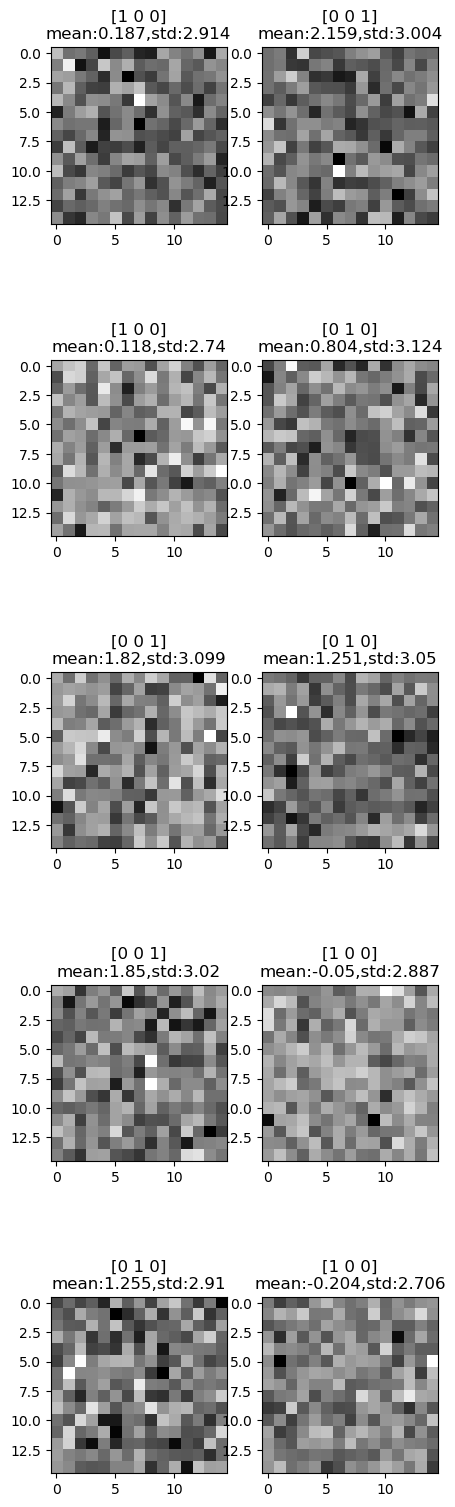

In [2]:
n=15
std=3
x_dat,y_dat= generate_test_data(n,3)
plt.figure(1,figsize=(5,20), dpi=100)
for i in range(10):
    ax = plt.subplot2grid((5, 2), (i%5,i%2 ), colspan = 1, rowspan = 1)
    ax.set_title('{}\nmean:{},std:{}'.format(y_dat[i],round(x_dat[i].mean(),3),round(x_dat[i].std(),3)))
    ax.imshow(x_dat[i],cmap=plt.cm.gray_r)

>上图的分类其实很简单，所有点的值的均值就能将图的类别分开

>可以看出不同图的均值分别是0,1,2.

>分别测试线性还有CNN，看是否能正确区分

### optional-2 线性模型，定义+运行（具体方法linear_test见learn_test.py）

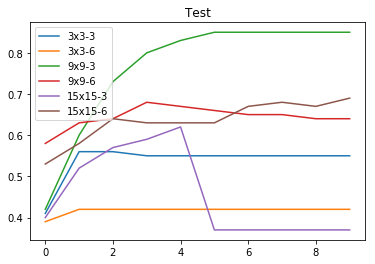

In [3]:
data = []
columns = []
for i in range(3,20,6):
    for j in range(3,7,3):
        data.append(linear_test(i,j))
        columns.append('{0}x{0}-{1}'.format(i,j))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

**说明：可以看出模拟的数据，在std小的时候表现要比std大的时候好，且参数的数目也有很大关系，可以防止过拟合**
**这一共是1000张图训练出来的效果，对于15x15这样的参数数目，1000个样本已经无法很好的训练出模型了**

### optional-3 CNN模型，定义+运行（具体方法cnn_test见learn_test.py）

In [4]:
data = []
columns = []
for i in range(10,100,10):
    for j in range(3,7,3):
        data.append(cnn_test(i,j))
        columns.append('{0}x{0}-{1}'.format(i,j))
data=pd.DataFrame(data).T
data.columns=columns
data.plot(title='Test')
plt.legend()
plt.show()

InvalidArgumentError: Incompatible shapes: [900,3] vs. [2025,3]
	 [[Node: mul_6 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_13_0_1, Log_6)]]

Caused by op 'mul_6', defined at:
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "D:\ProgramData\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "d:\projects\jupyter_projects\venv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tornado\platform\asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "D:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 421, in run_forever
    self._run_once()
  File "D:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1431, in _run_once
    handle._run()
  File "D:\ProgramData\Anaconda3\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tornado\ioloop.py", line 759, in _run_callback
    ret = callback()
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 536, in <lambda>
    self.io_loop.add_callback(lambda : self._handle_events(self.socket, 0))
  File "d:\projects\jupyter_projects\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "d:\projects\jupyter_projects\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\zmq\eventloop\zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tornado\stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\ipykernel\zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "d:\projects\jupyter_projects\venv\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-da174d5abdea>", line 5, in <module>
    data.append(cnn_test(i,j))
  File "D:\PROJECTS\jupyter_Projects\src\learn_utils.py", line 66, in cnn_test
    cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\ops\math_ops.py", line 971, in binary_op_wrapper
    return func(x, y, name=name)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\ops\math_ops.py", line 1198, in _mul_dispatch
    return gen_math_ops.mul(x, y, name=name)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\ops\gen_math_ops.py", line 4991, in mul
    "Mul", x=x, y=y, name=name)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 3290, in create_op
    op_def=op_def)
  File "d:\projects\jupyter_projects\venv\lib\site-packages\tensorflow\python\framework\ops.py", line 1654, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Incompatible shapes: [900,3] vs. [2025,3]
	 [[Node: mul_6 = Mul[T=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_Placeholder_13_0_1, Log_6)]]
